# Lab 6 - World Happiness Data Analysis
Julia Beitel - Big Data - October 30, 2018

# Introduction

### Abstract

For this lab, I wanted to look at the following dataset package: https://www.kaggle.com/unsdsn/world-happiness

These three datasets show real-life data from the Gallup World Happiness Report in the years 2015, 2016, and 2017. The World Happiness Report is a annual global survey on worldwide happiness. This is a short example of what the poll is about: http://worldhappiness.report/

These datasets were found on Kaggle.com. Each variable measured reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries. The rankings are based on answers to the main life evaluation question asked in the Gallup Annual World poll. This is called the Cantril ladder: it asks respondents to think of on a scale from 1-10, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2015-2017. They are based entirely on the survey scores, using the Gallup weights to make the estimates representative.

### Column Context

The subsections show the estimated extent to which each of the factors - levels of GDP, life expectancy, generosity, social support, trust, freedom, and corruption - contribute to making life evaluations higher in each country than they are in the Dystopia residual. They have no impact on the total score reported for each country, but instead are just a way of explaining for each country by the company that surveyed users:
For each column there are either 158 (2015 data) rows, 157 (2016 data) rows, or 155 rows (2017 data). These numbers vary based off of the available countries for sampling. Each year these numbers changed based off of availability. Since there is no missing data, there are full entries for each column in every row. 
 
 
Each variable represents something different so no matter if I chose to analyze it or not, these are their defintions:

1) dystopia residual: The lowest scores observed for the six key variables, therefore, characterize dystopia, so the dystopia residual score is an average of the other six key variables in short. These variables consist of the country’s levels of lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support. The formula for this variable is Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer. Metadata describes the dystopia residual as the extent to which Dystopia Residual contributed to the calculation of the Happiness Score. This column is numeric. 

2) family: Metadata describes the family score as the extent to which Family contributes to the calculation of the Happiness Score. This column is numeric. 

3) generosity: The metadata describes the generosity score as the extent to which Generosity contributed to the calculation of the Happiness Score. This column is numeric. 

4) whisker high and low/confidence interval/standard error: These variables provided no information in the meta data, one of the reasons why I am deleting them from my analysis. Additionally, these column could display: the outliers of the data, as a “box and whisker” plot shows outliers and data not in the IQR (interquartile range) on the whiskers and/or the confidence fo truth behind these values due to bias in sampling and such. This column is numeric. 

5) happiness score: This column is the metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest?”. This column is numeric. 

6) happiness rank: This score shows the rank of each country based off of the corresponding happiness score. This column is numeric. 

7) economy score: This score represents, in the metadata, the extent to which GDP contributes to the calculation of the Happiness Score. This column is numeric. 

8) trust score: The score represents, in the metadata, the extent to which the “Government Corruption” contributes to Happiness Score. This column is numeric. 

9) freedom: This score is said to represent, in the metadata, the extent to which “Freedom” contributed to the calculation of the Happiness Score. This column is numeric. 

10) health score: This score is represented, in the metadata, as the extent to which “Life expectancy” contributed to the calculation of the Happiness Score. This column is numeric. 

11) country name: This column represents the name of each corresponding country for the data collected. This column is categorical. 


### Missing Data

I was lucky enough to have no missing data in my dataset. (Therefore, nothing to address)

### My Plan
I want to use the happiness score (because I want to use it to compare with other variables), happiness rank (because it is the main variable of dataset) , economy score, trust score, freedom, and health score (because I want to focus on politics).


I am planning on not using the dystopia residual (because I do not want to look at a variable which is summarizing an imaginary country that has the world's least happy people), family and generosity (because I would rather focus on governmental and political variables), whisker high and low (because I do not want to look at outlier data), and region (only 2/3 datasets have Region column and unecessary to my analysis to show by region).

### First...
I imported the necessary data packages from pandas and added a line of code that makes pandas graphs visible. Then I opened my datasets into three corresponding variables based on years. 

In [42]:
#import data packages
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns #updraded seaborn as 0.9.0 in anaconda
import statsmodels.api as sm
import statsmodels.formula.api as smf

#makes graph visible in this notebook
#Ms.Sconyers helped me append this line of code
%matplotlib inline

In [43]:
#This is one line to open and read my csv file into a data frame data structure
#Additionally, I needed a special encoding add-in because my computer was blowing up
#Ms.Sconyers previously helped me find the specfic encoding that I needed
#I set these data sets as 'df + year' because they each correspond to a different year
df2015 = pd.read_csv('happinessdata2015.csv', encoding= 'ISO-8859-1')
df2016 = pd.read_csv('happinessdata2016.csv', encoding= 'ISO-8859-1')
df2017 = pd.read_csv('happinessdata2017.csv', encoding= 'ISO-8859-1')

# Data Cleaning and Visualizations

## 2015 Data

2015 dataset includes:
- 13 columns and 158 rows/countries
- Variables: country, region, happiness rank, happiness score, standard of error, GDP per capita, family, life expectancy, freedom, government corruption, generosity, and dystopia residual. (see above for descriptions)

### Data Cleaning: 

I plan on taking out the columns/variables that I said before that I do not want to look at (dystopia residual, family, generosity, standard error, confidence intervals, whisker high and low).
Cleaning up column headers to simplify parentheses in headers. 

In [44]:
#I used the .info() function to look at first hand information of the dataset. 
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [45]:
#I used the .head() function to look the first few rows of data and not view the entire set.
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [46]:
#Next, I renamed my column names without parantheses to make every dataset the same. 
df2015.rename(columns={
    list(df2015)[0] : 'Country',
    list(df2015)[1] : 'Region',
    list(df2015)[2] : 'Happiness Rank',
    list(df2015)[3] : 'Happiness Score',
    list(df2015)[4] : 'Standard Error',
    list(df2015)[5] : 'GDP',
    list(df2015)[6] : 'Family',
    list(df2015)[7] : 'Life Expectancy',
    list(df2015)[8] : 'Freedom',
    list(df2015)[9] : 'Government Corruption',
    list(df2015)[10] : 'Generosity',
    list(df2015)[11] : 'Dystopia Residual'},
    inplace=True)
df2015.head() #here you can see the changes I made and how much more clean the headers look

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Life Expectancy,Freedom,Government Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [47]:
#next I dropped the standard error column which I (stated before) do not want to analyze in this lab
#I had to do this in separate blocks because the code would not work when it was in the same block
#That is why each .drop() function is in a different block and there are not comments in every of the following
df2015.drop('Standard Error', axis = 1, inplace = True)
#I dropped the dystopia residual because I did not want to analyze this (see explanation in introduction)
df2015.drop('Dystopia Residual', axis = 1, inplace = True)
#I dropped the region column because only 2 out of the 3 datasets had a regions column and...
#I did not want to analyze this (see explanation in introduction)
df2015.drop('Region', axis = 1, inplace = True)
#I dropped the family column because I did not want to analyze this (see explanation in introduction)
df2015.drop('Family', axis = 1, inplace = True)
#I dropped the generosity column because I did not want to analyze this (see explanation in introduction)
df2015.drop('Generosity', axis = 1, inplace = True)

In [48]:
df2015.head() #here you can see the changes I made and how much cleaner the dataset looks

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Government Corruption
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957


In [49]:
#In order to display the correlation coefficent, I needed to clean the correlation table
#I used to same drop() seaborn function method as I did for the above column dropping
#And I used the .corr() function to call the linear correlation of my regression plot

corr2015 = df2015.corr(method='pearson')

corr2015.drop('GDP', axis = 1, inplace = True)
corr2015.drop('Life Expectancy', axis = 1, inplace = True)
corr2015.drop('Freedom', axis = 1, inplace = True)
corr2015.drop('Government Corruption', axis = 1, inplace = True)
corr2015.drop('Happiness Rank', axis = 1, inplace = True)

### 2015 Data Visualizations:


#### Map Plot
In order to display my map graphs I...

1. Created a map plot through the Tableau software, combining my corresponding 2015 dataset to the world map outline. 
2. Arranged the data so that high numbers correlated to red/orange and low numbers correlated to blue tones. 
3. Created a legend and titled the countries so that the larger ones have their names visible.
4. Screenshotted the Tableau Public Lab Post I made on this link: https://public.tableau.com/profile/julia1051#!/vizhome/LAB6_3/Story1?publish=yes
5. Uploaded the screenshot using the import Image package in the IPython.display function

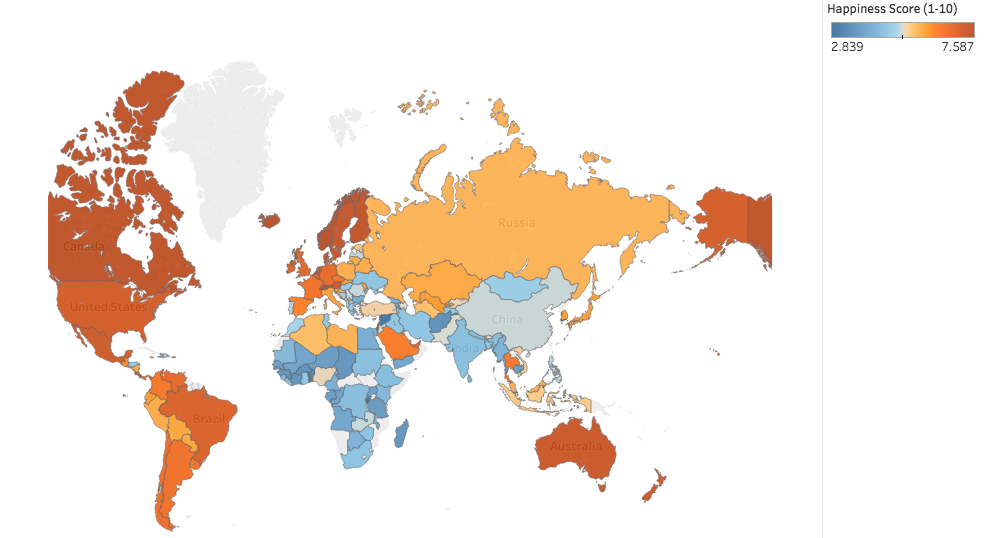

In [50]:
from IPython.display import Image
map2015 = Image(filename="Map1.png", width=800, height=800)
map2015

This maplot briefly shows that countries in Africa and Asia have lower Happiness Scores, while countries in Europe, the Americas, and Australia have higher Happiness Scores. 

#### Linear Regression Plot

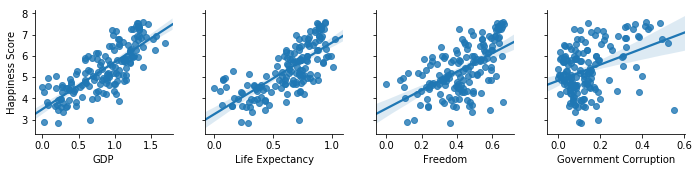

In [51]:
#2015 DATA
#using pairplot() fxn of seaborn
#parameter of y axis with happiness scores
#parameter of x axis with 4 analysis variables
#these variables include: GDP, freefom, life expectancy, and government corruption
#parameter of the type of pairplot() graph is regression 
sns.pairplot(df2015, y_vars=['Happiness Score'], 
            x_vars=['GDP', 'Life Expectancy','Freedom','Government Corruption'], kind='reg')

In [52]:
corr2015 #display (explained in cleaning section) of correlation coefficents of linear regression plot

,Happiness Score
Happiness Rank,-0.992105
Happiness Score,1.000000
GDP,0.780966
Life Expectancy,0.724200
Freedom,0.568211
Government Corruption,0.395199


GDP: This regression model fits the data very well by haing a positive, strong correlation between Happiness Score and GDP. This correlation is 0.78 so it is strong. 

Life Expectancy: This regression model also fits the data well by having a positive, strong correlation between Happiness Score and Life Expectancy. This correaltion is 0.72 so it is also strong but it is not as strong as GDP correlation. 

Freedom: This regression model doesn't seem to fit the data as well as the first two variables by having a positive, moderate correlation between Happiness Score and Freedom. This correlation is 0.57 so it is medium strength. 

Government Corruption: This regression model does not seem to fit the data by having a positive, weak correlation between Happiness Score and Government Corruption. This correlation is 0.40 so it is weak strength. 

## 2016 Data

2016 dataset includes:
- 13 columns and 157 rows/countries 
- Variables: country, region, happiness rank, happiness score, lower confidence interval, upper confidence interval, GDP, family, life expectancy, freedom, government corruption, generosity, and dystopia residual. (see above for descriptions)

### Data Cleaning: 

I plan on taking out the columns/variables that I said before that I do not want to look at (dystopia residual, family, generosity, standard error, confidence intervals, whisker high and low).
Cleaning up column headers to simplify parentheses in headers. 

In [53]:
#I used the .info() function to look at first hand information of the dataset. 
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [54]:
#I used the .head() function to look the first few rows of data and not view the entire set.
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [55]:
#Next, I renamed my column names without parantheses to make every dataset the same. 
df2016.rename(columns={
    list(df2016)[0] : 'Country',
    list(df2016)[1] : 'Region',
    list(df2016)[2] : 'Happiness Rank',
    list(df2016)[3] : 'Happiness Score',
    list(df2016)[4] : 'Low Confidence',
    list(df2016)[5] : 'High Confidence',
    list(df2016)[6] : 'GDP',
    list(df2016)[7] : 'Family',
    list(df2016)[8] : 'Life Expectancy',
    list(df2016)[9] : 'Freedom',
    list(df2016)[10] : 'Government Corruption',
    list(df2016)[11] : 'Generosity',
    list(df2016)[12] : 'Dystopia Residual'},
    inplace=True)
df2016.head() #here you can see the changes I made and how much more clean the headers look

,Country,Region,Happiness Rank,Happiness Score,Low Confidence,High Confidence,GDP,Family,Life Expectancy,Freedom,Government Corruption,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [56]:
#next I dropped the low confidence column which I (stated before) do not want to analyze in this lab
#I had to do this in separate blocks because the code would not work when it was in the same block
#That is why each .drop() function is in a different block and there are not comments in every of the following
df2016.drop('Low Confidence', axis = 1, inplace = True)
#I dropped the high confidence column because I did not want to analyze this (see explanation in introduction)
df2016.drop('High Confidence', axis = 1, inplace = True)
#I dropped the family column because I did not want to analyze this (see explanation in introduction)
df2016.drop('Family', axis = 1, inplace = True)
#I dropped the generosity column because I did not want to analyze this (see explanation in introduction)
df2016.drop('Generosity', axis = 1, inplace = True)
#I dropped the region column because only 2 out of the 3 datasets had a regions column and...
#I did not want to analyze this (see explanation in introduction)
df2016.drop('Region', axis = 1, inplace = True)
#I dropped the dystopia residual column because I did not want to analyze this (see explanation in introduction)
df2016.drop('Dystopia Residual', axis = 1, inplace = True)

In [57]:
df2016.head() #here you can see the changes I made and how much cleaner the dataset looks

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Government Corruption
0,Denmark,1,7.526,1.44178,0.79504,0.57941,0.44453
1,Switzerland,2,7.509,1.52733,0.86303,0.58557,0.41203
2,Iceland,3,7.501,1.42666,0.86733,0.56624,0.14975
3,Norway,4,7.498,1.57744,0.79579,0.59609,0.35776
4,Finland,5,7.413,1.40598,0.81091,0.57104,0.41004


In [58]:
#In order to display the correlation coefficent, I needed to clean the correlation table
#I used to same drop() seaborn function method as I did for the above column dropping
#And I used the .corr() function to call the linear correlation of my regression plot

corr2016 = df2016.corr(method='pearson')

corr2016.drop('GDP', axis = 1, inplace = True)
corr2016.drop('Life Expectancy', axis = 1, inplace = True)
corr2016.drop('Freedom', axis = 1, inplace = True)
corr2016.drop('Government Corruption', axis = 1, inplace = True)
corr2016.drop('Happiness Rank', axis = 1, inplace = True)

### 2016 Data Visualizations:


#### Map Plot
In order to display my map graphs I...

1. Created a map plot through the Tableau software, combining my corresponding 2016 dataset to the world map outline. 
2. Arranged the data so that high numbers correlated to red/orange and low numbers correlated to blue tones. 
3. Created a legend and titled the countries so that the larger ones have their names visible.
4. Screenshotted the Tableau Public Lab Post I made on this link: https://public.tableau.com/profile/julia1051#!/vizhome/LAB6_3/Story1?publish=yes
5. Uploaded the screenshot using the import Image package in the IPython.display function

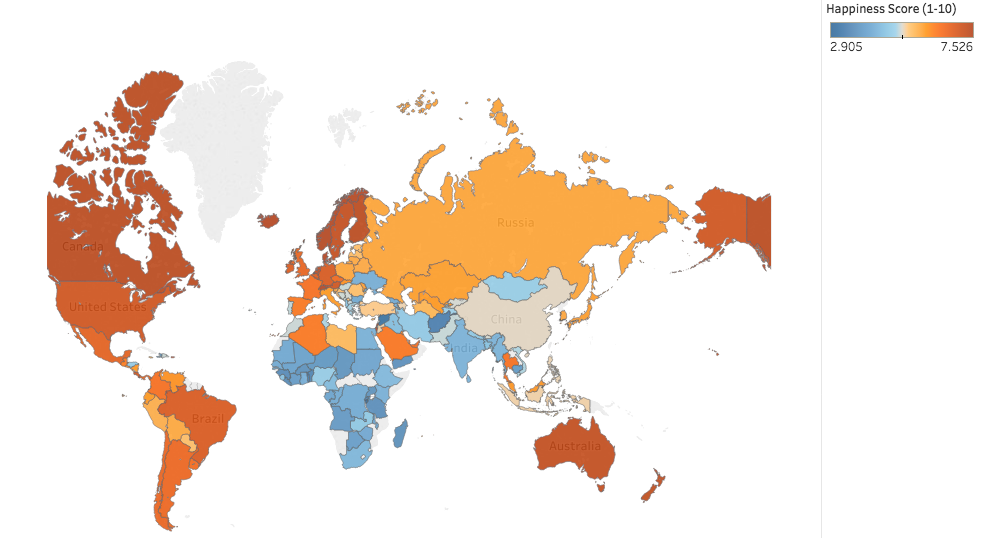

In [59]:
from IPython.display import Image
map2016 = Image(filename="Map2.png", width=800, height=800)
map2016

This maplot briefly shows that countries in Africa and Asia have lower Happiness Scores, while countries in Europe, the Americas, and Australia have higher Happiness Scores. 

#### Linear Regression Plot

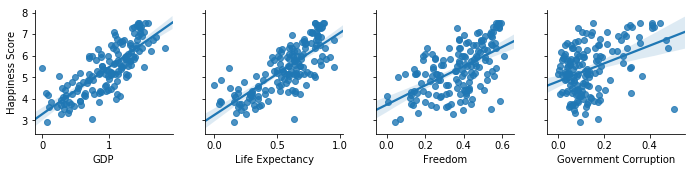

In [60]:
#2016 DATA
#using pairplot() fxn of seaborn
#parameter of y axis with happiness scores
#parameter of x axis with 4 analysis variables
#these variables include: GDP, freefom, life expectancy, and government corruption
#parameter of the type of pairplot() graph is regression 
sns.pairplot(df2016, y_vars=['Happiness Score'], 
            x_vars=['GDP', 'Life Expectancy','Freedom','Government Corruption'], kind='reg')

In [61]:
corr2016 #display (explained in cleaning section) of correlation coefficents of linear regression plot

,Happiness Score
Happiness Rank,-0.995743
Happiness Score,1.000000
GDP,0.790322
Life Expectancy,0.765384
Freedom,0.566827
Government Corruption,0.402032


GDP: This regression model fits the data very well by haing a positive, strong correlation between Happiness Score and GDP. This correlation is 0.79 so it is strong. 

Life Expectancy: This regression model also fits the data well by having a positive, strong correlation between Happiness Score and Life Expectancy. This correaltion is 0.77 so it is also strong but it is not as strong as GDP correlation. 

Freedom: This regression model doesn't seem to fit the data as well as the first two variables by having a positive, moderate correlation between Happiness Score and Freedom. This correlation is 0.57 so it is medium strength. 

Government Corruption: This regression model does not seem to fit the data by having a positive, weak correlation between Happiness Score and Government Corruption. This correlation is 0.40 so it is weak strength. 

## 2017 Data

2017 dataset includes:
- 12 columns and 155 rows/countries 
- Variables: country, happiness score, high whisker, low whisker, GDP, family, life expectancy, freedom, generosity, government corruption, and dystopia residual. (see above for descriptions)

### Data Cleaning: 

I plan on taking out the columns/variables that I said before that I do not want to look at (dystopia residual, family, generosity, standard error, confidence intervals, whisker high and low).
Cleaning up column headers to simplify parentheses in headers. 

In [62]:
#I used the .info() function to look at first hand information of the dataset. 
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [63]:
#I used the .head() function to look the first few rows of data and not view the entire set.
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [64]:
#Next, I renamed my column names without parantheses to make every dataset the same. 
df2017.rename(columns={
    list(df2017)[0] : 'Country',
    list(df2017)[1] : 'Happiness Rank',
    list(df2017)[2] : 'Happiness Score',
    list(df2017)[3] : 'High Whisker',
    list(df2017)[4] : 'Low Whisker',
    list(df2017)[5] : 'GDP',
    list(df2017)[6] : 'Family',
    list(df2017)[7] : 'Life Expectancy',
    list(df2017)[8] : 'Freedom',
    list(df2017)[9] : 'Generosity',
    list(df2017)[10] : 'Government Corruption',
    list(df2017)[11] : 'Dystopia Residual'},
    inplace=True)
df2017.head() #here you can see the changes I made and how much more clean the headers look

,Country,Happiness Rank,Happiness Score,High Whisker,Low Whisker,GDP,Family,Life Expectancy,Freedom,Generosity,Government Corruption,Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [65]:
#next I dropped the high whisker column which I (stated before) do not want to analyze in this lab
#I had to do this in separate blocks because the code would not work when it was in the same block
#That is why each .drop() function is in a different block and there are not comments in every of the following
df2017.drop('High Whisker', axis = 1, inplace = True)
#I dropped the low whisker column because I did not want to analyze this (see explanation in introduction)
df2017.drop('Low Whisker', axis = 1, inplace = True)
#I dropped the family column because I did not want to analyze this (see explanation in introduction)
df2017.drop('Family', axis = 1, inplace = True)
#I dropped the generosity column because I did not want to analyze this (see explanation in introduction)
df2017.drop('Generosity', axis = 1, inplace = True)
#I dropped the dystopia residual column because I did not want to analyze this (see explanation in introduction)
df2017.drop('Dystopia Residual', axis = 1, inplace = True)

In [66]:
df2017.head() #here you can see the changes I made and how much cleaner the dataset looks

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Government Corruption
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.315964
1,Denmark,2,7.522,1.482383,0.792566,0.626007,0.400770
2,Iceland,3,7.504,1.480633,0.833552,0.627163,0.153527
3,Switzerland,4,7.494,1.564980,0.858131,0.620071,0.367007
4,Finland,5,7.469,1.443572,0.809158,0.617951,0.382612


In [69]:
#In order to display the correlation coefficent, I needed to clean the correlation table
#I used to same drop() seaborn function method as I did for the above column dropping
#And I used the .corr() function to call the linear correlation of my regression plot

corr2017 = df2017.corr(method='pearson')

corr2017.drop('GDP', axis = 1, inplace = True)
corr2017.drop('Life Expectancy', axis = 1, inplace = True)
corr2017.drop('Freedom', axis = 1, inplace = True)
corr2017.drop('Government Corruption', axis = 1, inplace = True)
corr2017.drop('Happiness Rank', axis = 1, inplace = True)

### 2017 Data Visualizations:


#### Map Plot
In order to display my map graphs I...

1. Created a map plot through the Tableau software, combining my corresponding 2017 dataset to the world map outline. 
2. Arranged the data so that high numbers correlated to red/orange and low numbers correlated to blue tones. 
3. Created a legend and titled the countries so that the larger ones have their names visible.
4. Screenshotted the Tableau Public Lab Post I made on this link: https://public.tableau.com/profile/julia1051#!/vizhome/LAB6_3/Story1?publish=yes
5. Uploaded the screenshot using the import Image package in the IPython.display function

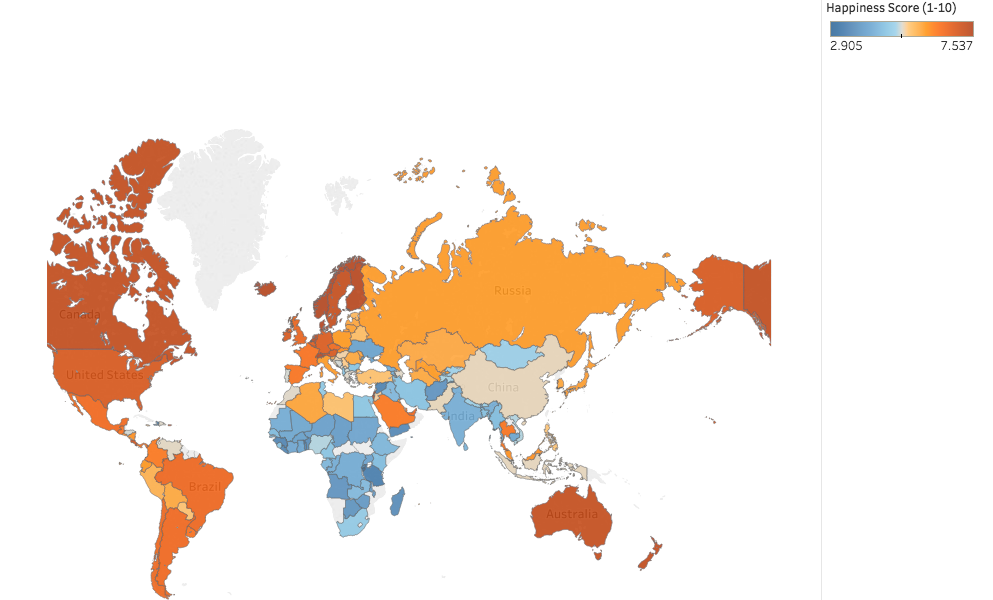

In [67]:
from IPython.display import Image
map2017 = Image(filename="Map3.png", width=800, height=800)
map2017

This maplot briefly shows that countries in Africa and Asia have lower Happiness Scores, while countries in Europe, the Americas, and Australia have higher Happiness Scores. 

#### Linear Regression Plot

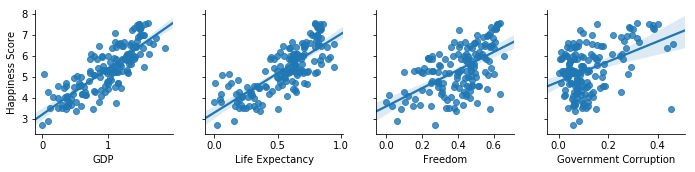

In [68]:
#2017 DATA
#using pairplot() fxn of seaborn
#parameter of y axis with happiness scores
#parameter of x axis with 4 analysis variables
#these variables include: GDP, freefom, life expectancy, and government corruption
#parameter of the type of pairplot() graph is regression 
sns.pairplot(df2017, y_vars=['Happiness Score'], 
            x_vars=['GDP', 'Life Expectancy','Freedom','Government Corruption'], kind='reg')

In [71]:
corr2017 #display (explained in cleaning section) of correlation coefficents of linear regression plot

,Happiness Score
Happiness Rank,-0.992774
Happiness Score,1.000000
GDP,0.812469
Life Expectancy,0.781951
Freedom,0.570137
Government Corruption,0.429080


GDP: This regression model fits the data very well by haing a positive, strong correlation between Happiness Score and GDP. This correlation is 0.81 so it is strong. 

Life Expectancy: This regression model also fits the data well by having a positive, strong correlation between Happiness Score and Life Expectancy. This correaltion is 0.78 so it is also strong but it is not as strong as GDP correlation. 

Freedom: This regression model doesn't seem to fit the data as well as the first two variables by having a positive, moderate correlation between Happiness Score and Freedom. This correlation is 0.57 so it is medium strength. 

Government Corruption: This regression model does not seem to fit the data by having a positive, weak correlation between Happiness Score and Government Corruption. This correlation is 0.43 so it is weak strength. 

## Data Analysis

### 2015 Data

With the 2015 dataset, I found:
- The correlations of the linear regression plots between GDP and Life Expectancy with the Happiness Score were strong (r = {0.78, 0.72}), while the correlations of the linear regression plots between Freedom and Government Corruption with the Happiness Score were only a little weaker ( r = {0.57, 0.40}).
- Countries in Europe, the Americas, and Australia were (by way of a maplot) visually happier than those in African and Asian countries. This is not to say that every single country in Europe, the Americas, and Australia were higher each time when compared to those of Africa and Asia, but is to say that there was a noticable visual trend between these regional levels of happiness.

### 2016 Data

With the 2016 dataset, I found:
- The correlation of the linear regression plots between GDP and Life Expectancy with the Happiness Score were strong (r = {0.80, 0.77}), while the correlation of the linear regression plots between Freedom and Government Corruption with the Happiness Score were slighty weaker ( r = {0.57, 0.40}). 
- Countries in Europe, the Americas, and Australia were (by way of a maplot) visually happier than those in African and Asian countries. This is not to say that every single country in Europe, the Americas, and Australia were higher each time when compared to those of Africa and Asia, but is to say that there was a noticable visual trend between these regional levels of happiness.

### 2017 Data

With the 2017 dataset, I found:
- The correlations of the linear regression plots between GDP and Life Expectancy with the Happiness Score were strong (r = {0.81, 0.78}), while the correlations of the linear regression plots between Freedom and Government Corruption with the Happiness Score were weaker ( r = {0.57, 0.43}). These numbers were the greatest values for each variable throughout the three year's datasets so this shows an upwards trend in global happiness (in a small sample size of 3 years). 
- Countries in Europe, the Americas, and Australia were (by way of a maplot) visually happier than those in African and Asian countries. This is not to say that every single country in Europe, the Americas, and Australia were higher each time when compared to those of Africa and Asia, but is to say that there was a noticable visual trend between these regional levels of happiness.

## Data Conclusion

With my analysis I came to a few conclusions. 

- First, I found that because with each year the correlations between Happiness score and the other variables was increasing, there was evidence for an **upward trend of global happiness**. Though this is in a small sample size of only 3 years, it goes to show a comparison over a small chunck of a large populations lived experiences.
- Second, I found that there were overall higher correlations between Happiness with GDP and Life Expectancy than there were for Freedom and Government Corruption. This makes sense because it seems that **a country's wealth definetly plays an overall large factor on personal success within a country and the happiness that accompanies that chance for success**. Though, I do not know that with the Freedom and Government Corruption variables it is say that with a higher Happiness, there is a high chance of a LOWER Government Corruption, or there is a LOW chance of high happiness and high government corruption. Both of these explanations make sense and I think given the visualizations and numbers of the data, both interpretations make logical sense. 
- Thirdly, I found that countries in Europe, the Americas, and Australia were happier than those in African and Asian countries. This might be a factor of **more spread out poverty and less general wealth in Africa and Asian countries**. 

## Areas for Further Exploration

If were able to have more time pursuing this lab, I would want to do two main things, besides a list of many more.

1) I would like to append a regional variable to the 2017 data and analyze the regional information on my datasets as to come to a more conrete conclusion on how global region impacts Happiness Score.

2) I Would like to try some predictive analysis and predict what the Gallup World Happiness Poll will be for 2018. I could do this by randomly generating a number 1-3 that correlates to an index of Happiness rank variables with each index Country Name from each year. These random numbers could generate a guess for who is likely to with in 2018. 

Additionally, it would be interesting to do some of my own polling and sampling. What are the factors that contribute to my peers success? Community at Uprep? I could even poll my classmates at Uprep with the same questions as the Gallup World Happiness Poll and analyze how my classmates numbers compare to the global numbers.

## Acknowledgements

I would like to acknoeledge the following sources from this lab:

- Kaggle.com gave me my datasets
- Ms.Sconyers helped me figure out the Tableau Software and how to download photos on Jupyter Notebook labs
- Seaborn.pydata.org gave me the code for my linear regression plots and showed me how to find the correlation coeffecient.